In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Iris Clustering

In [4]:
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = iris['data']
y = iris['target']

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [8]:
X_2d = PCA(n_components=2).fit_transform(X)

In [15]:
steps = [('dimension reduction', PCA(n_components=2)),
         ('clustering', KMeans(n_clusters=3))]

cls = Pipeline(steps=steps).fit(X)

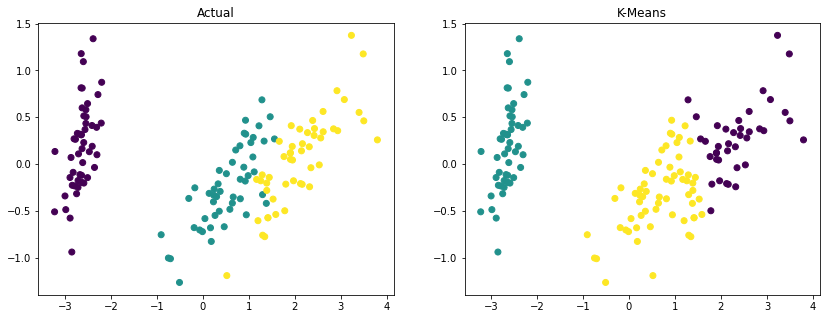

In [18]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.title('Actual')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y);

plt.subplot(122)
plt.title('K-Means')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cls.predict(X));

# Elbow method:

In [19]:
from sklearn.metrics import calinski_harabasz_score

In [22]:
inertia = []
calinski = []
n_clusters = []

for k in range(2, 16):
    cls = KMeans(n_clusters=k).fit(X)
    n_clusters.append(k)
    inertia.append(cls.inertia_)
    calinski.append(calinski_harabasz_score(X, cls.predict(X)))

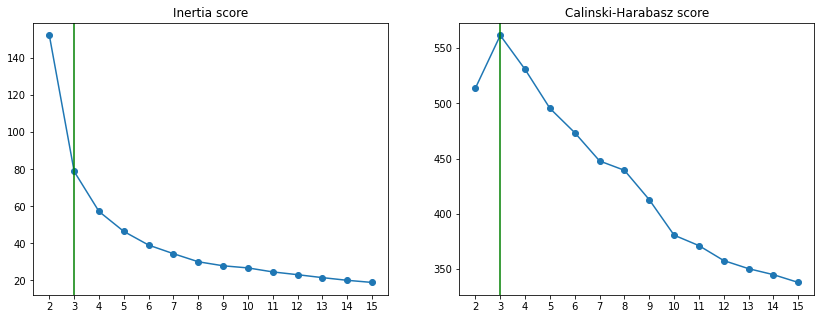

In [30]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.title('Inertia score')
plt.plot(n_clusters, inertia, '-o');
plt.xticks(n_clusters)
plt.axvline(3, color='green')

plt.subplot(122)
plt.title('Calinski-Harabasz score')
plt.plot(n_clusters, calinski, '-o');
plt.xticks(n_clusters);
plt.axvline(3, color='green');

# Mall Customers

In [31]:
mall = pd.read_csv('_dataset/Mall_Customers.csv')

In [32]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
mall.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [35]:
mall = mall.drop(columns=['CustomerID'])

In [37]:
mall = mall.rename(columns={'Annual Income (k$)':'Income', 'Spending Score (1-100)': 'Score'})

In [38]:
mall

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


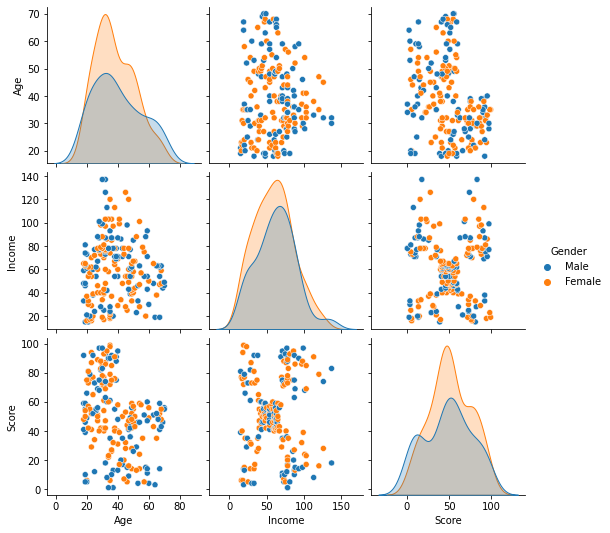

In [41]:
sns.pairplot(mall, hue='Gender');

In [42]:
from sklearn.cluster import DBSCAN, MeanShift

In [43]:
X = mall.copy()

In [46]:
X['Female'] = pd.get_dummies(X['Gender'])['Female']
X['Male'] = pd.get_dummies(X['Gender'])['Male']
X = X.drop(columns=['Gender'])

In [47]:
X

,Age,Income,Score,Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [48]:
inertia = []
calinski = []
n_clusters = []

for k in range(2, 16):
    cls = KMeans(n_clusters=k).fit(X)
    n_clusters.append(k)
    inertia.append(cls.inertia_)
    calinski.append(calinski_harabasz_score(X, cls.predict(X)))

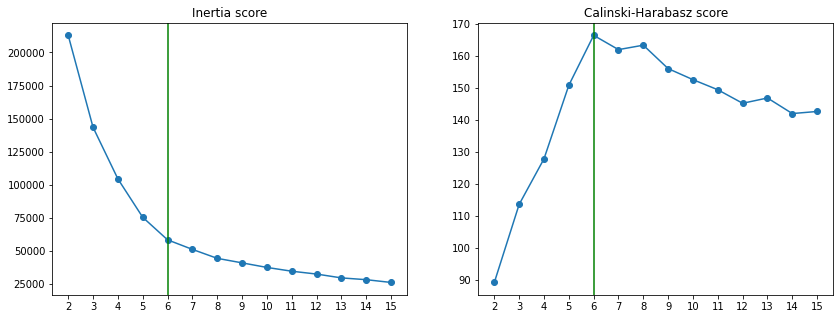

In [50]:
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.title('Inertia score')
plt.plot(n_clusters, inertia, '-o');
plt.xticks(n_clusters)
plt.axvline(6, color='green')

plt.subplot(122)
plt.title('Calinski-Harabasz score')
plt.plot(n_clusters, calinski, '-o');
plt.xticks(n_clusters);
plt.axvline(6, color='green');

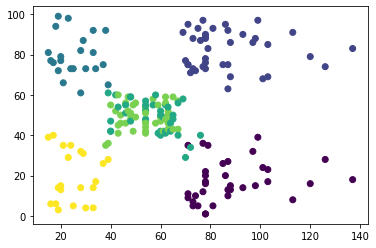

In [53]:
plt.scatter(X['Income'], X['Score'], c=KMeans(n_clusters=6).fit_predict(X));

In [67]:
calinski = []
bandwith = []

for b in np.arange(18, 24, 0.1):
    cls = MeanShift(bandwidth=b).fit(X)
    calinski.append(calinski_harabasz_score(X, cls.predict(X)))
    bandwith.append(b)
    


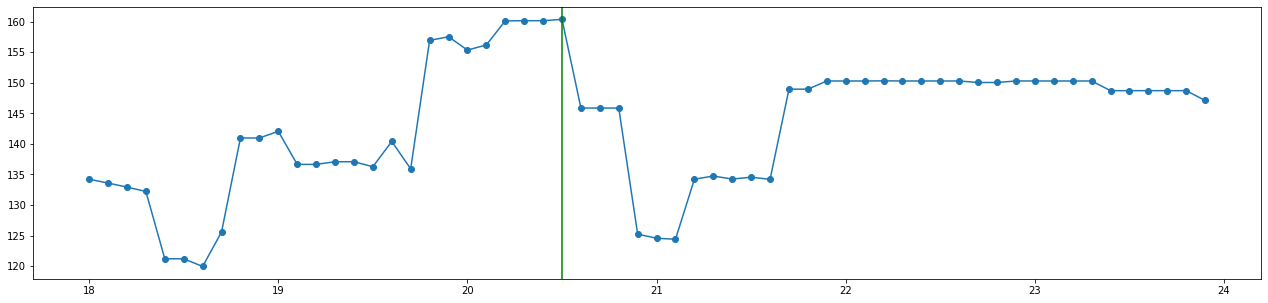

In [76]:
plt.figure(figsize=(22, 5))
plt.plot(bandwith, calinski, '-o');
plt.axvline(20.5, color='green')
# plt.xticks(bandwith);

8


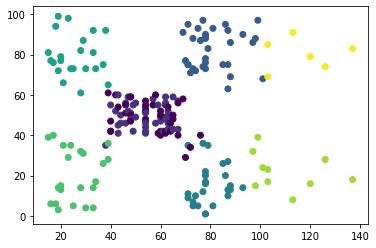

In [77]:
labels = MeanShift(bandwidth=20.5).fit_predict(X)
print(np.unique(labels).shape[0])
plt.scatter(X['Income'],
            X['Score'],
            c=labels);

5


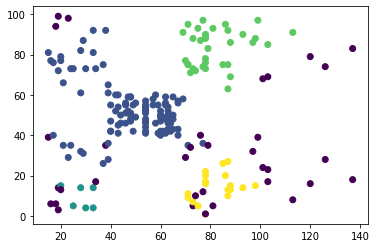

In [86]:
labels = DBSCAN(eps=12.2, min_samples=5).fit_predict(X)
print(np.unique(labels).shape[0])
plt.scatter(X['Income'],
            X['Score'],
            c=labels);

In [81]:
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0, -1,  0, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2, -1,  2,  1,  2, -1,  2, -1,  2, -1,  2, -1,  2,
       -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,
        2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3, -1,
        3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])